#**BUTTERFLY SPECIES CLASSIFICATION**

---



> deep learning project using CNN,improved by using VGG16.


> dataset link:https://drive.google.com/drive/folders/1wRRGlN90i_vcNE6Z5hqq61WpP129QlnY?usp=sharing


> butterflies are lively,bright coloured,beautiful insects.There are about 17,500 species of them worldwide.this project predicts 10 different species of butterflies.





### **import necessary libraries:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Dropout,Flatten
from tensorflow.keras.models import Sequential
from keras.optimizers import *

## **read image files from folder and reshape:**

In [ ]:
import cv2
path='/content/drive/MyDrive/butterfly dataset/images'
file=os.listdir(path)
img=[] 
spec=[] 
for i in file:
    label=int(i[:3]) 
    spec.append(label)
    img_array=cv2.imread(os.path.join(path,i),cv2.IMREAD_COLOR)
    img_array=cv2.resize(img_array,(256,256))
    img.append(img_array)


dataset contains around 800 images of butterflies of 10 different species.

## **mapping labels with species name:**

In [ ]:
dict={'001': 'Danaus_plexippus', '002': 'Heliconius_charitonius', '003': 'Heliconius_erato', '004': 'Junonia_coenia', '005': 'Lycaena_phlaeas', '006': 'Nymphalis_antiopa', '007': 'Papilio_cresphontes', '008': 'Pieris_rapae', '009': 'Vanessa_atalanta', '0010': 'Vanessa_cardui'} 

In [ ]:
species=[]
for i in spec:
    new_label=dict['00'+str(i)]
    species.append(new_label)
print(species[len(species)-10:])    

['Vanessa_cardui', 'Vanessa_cardui', 'Vanessa_cardui', 'Vanessa_cardui', 'Vanessa_cardui', 'Vanessa_cardui', 'Vanessa_cardui', 'Vanessa_cardui', 'Vanessa_cardui', 'Vanessa_cardui']


## **plotting random images from dataset:**

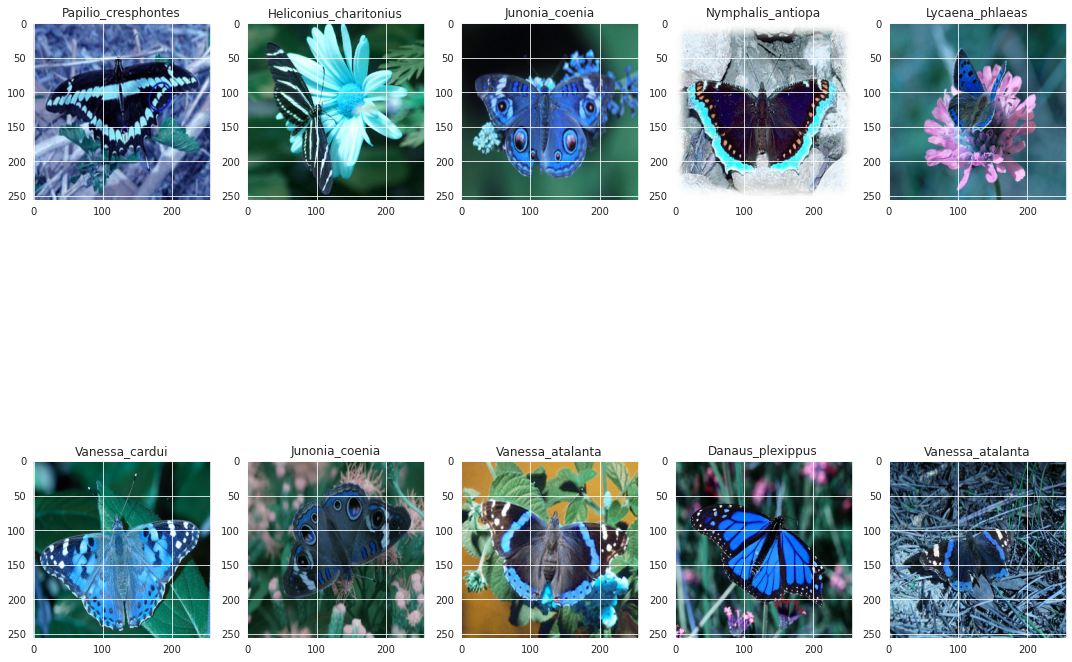

In [ ]:
fig,ax=plt.subplots(2,5)
fig.set_size_inches(15,15)
for i in range(2):
    for j in range (5):
        l=np.random.randint(0,len(spec))
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(str(species[l]))
plt.tight_layout()

## **dataset visualization:**

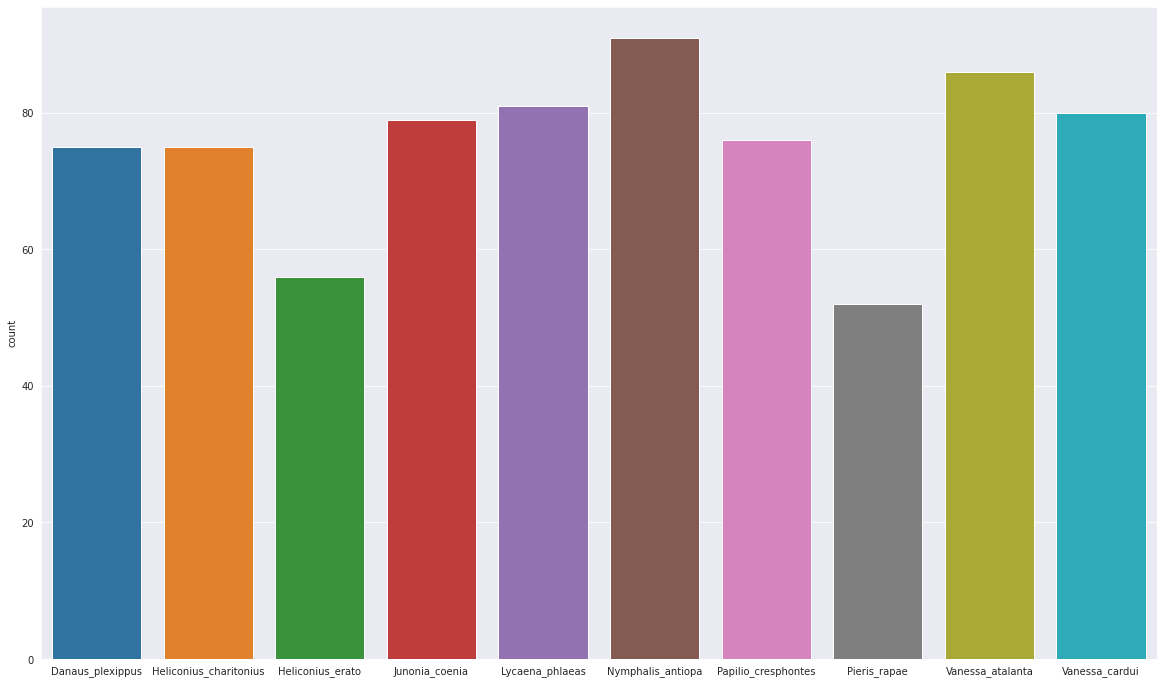

In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(x=species,)
plt.show()

dataset almost balanced doesn't need over sampling or under sampling.


## **converting images into numpy array and normalizing:**

In [ ]:
img=np.array(img)


In [ ]:
img=img/255

## **reshape image arrays to fit keras model:**

In [ ]:
img=img.reshape(-1,256,256,3)

## **label encoding for species name:**

In [ ]:
le=LabelEncoder()
y=le.fit_transform(species)

In [ ]:
y=to_categorical(y)

## **train test split:**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(img,y,random_state=11,test_size=0.2)

## **creating model:**

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(516, activation='relu'))

model.add(Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 128)      

## **train model:**

In [ ]:
%%time
m=model.fit(x_train,y_train,batch_size=12,epochs=50,validation_split=0.2)

NameError: ignored

## **plot accuracy of training:**

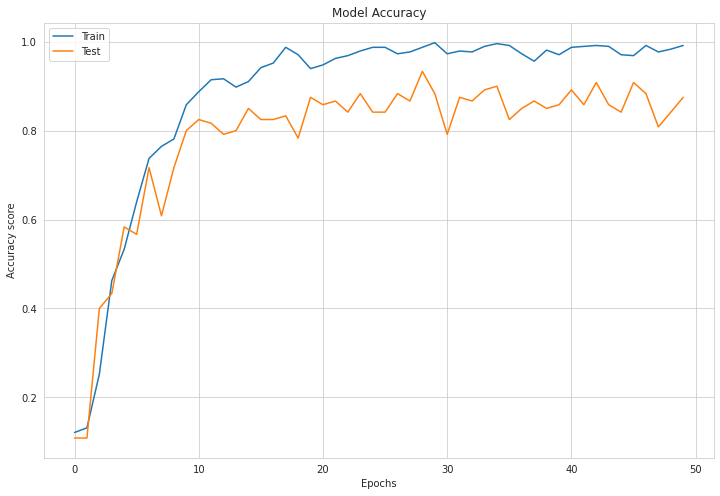

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.legend(['Train','Test'])
plt.show()

## **plot loss of model:**

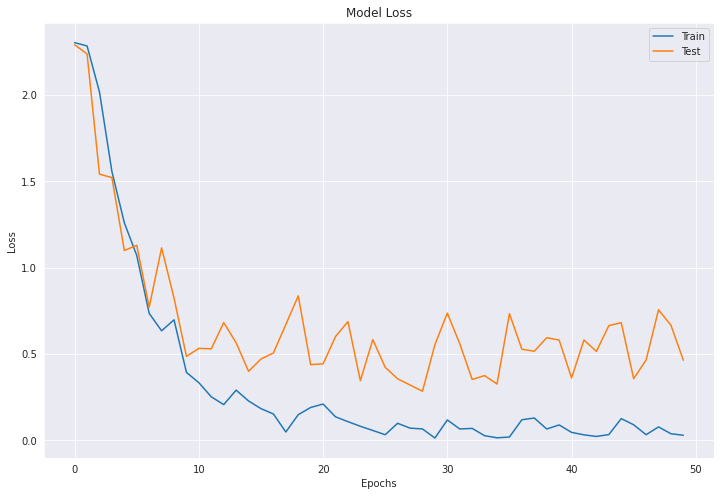

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['Train','Test'])
plt.show()

## **make predictions on test set:**

In [ ]:
preds=model.predict(x_test)

In [ ]:
predictions=np.argmax(preds,axis=1)

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)

5/5 [==============================] - 5s 966ms/step - loss: 1.1682 - accuracy: 0.8013


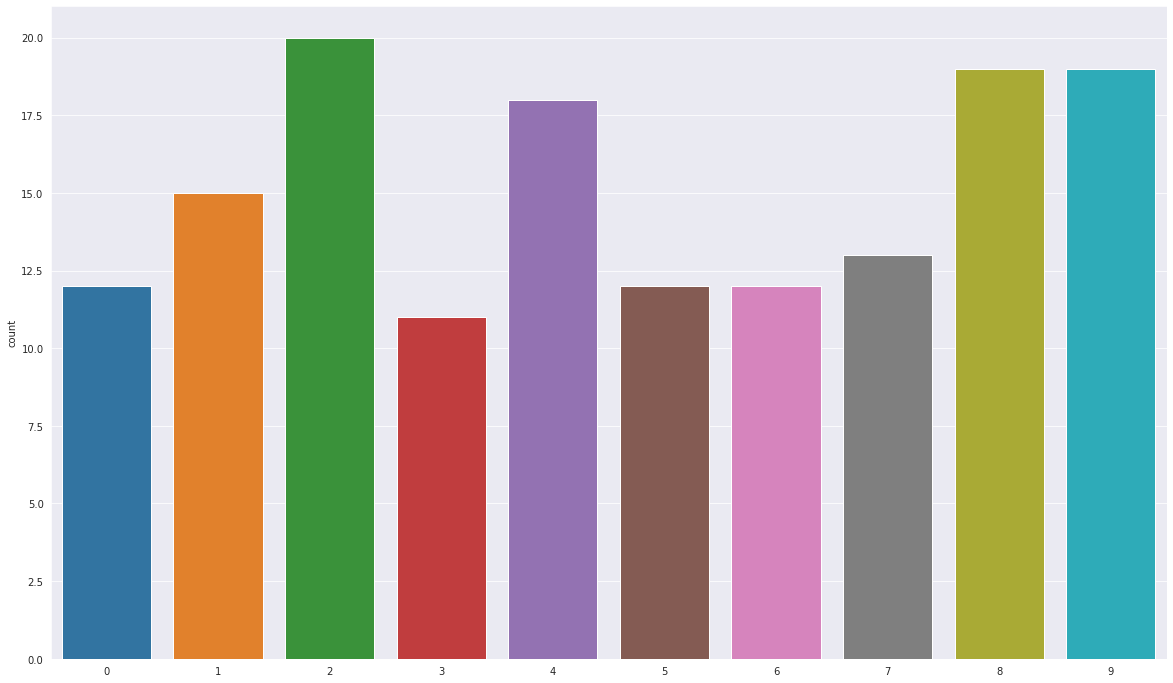

In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(x=predictions)
plt.show()

## **improve using pretrained model:**

---
using VGG16 model


In [ ]:
from keras.applications.vgg16 import VGG16
import tensorflow as tf

In [ ]:
vgg=tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',pooling='avg')

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
model2=Sequential([
    vgg,
    Dropout(0.25),
    Dense(10,activation='softmax') # here we use 10 layers because we have to predict bewtween 10 classes
])

In [ ]:

model2.layers[0].trainable = False
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
_________________________________________________________________


## **train model2:**

reshape to match VGG input shape(224*224)

In [ ]:
im2=[]
for i in file:
    label=int(i[:3]) #extracting labels from the image
    spec.append(label)
    img_array=cv2.imread(os.path.join(path,i),cv2.IMREAD_COLOR)
    img_array=cv2.resize(img_array,(224,224))
    im2.append(img_array)


In [ ]:
im2=np.array(im2)

In [ ]:
im2=im2/255

In [ ]:
im2.shape

(751, 224, 224, 3)

In [ ]:
im2=im2.reshape(-1,224,224,3)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(img,y,random_state=11,test_size=0.2)

In [ ]:
m2=model2.fit(x_train,y_train,batch_size=12, epochs=20,validation_split=0.3)

Epoch 1/20
35/35 [==============================] - 387s 11s/step - loss: 2.3813 - acc: 0.1119 - val_loss: 2.1662 - val_acc: 0.1444
Epoch 2/20
35/35 [==============================] - 386s 11s/step - loss: 2.0901 - acc: 0.2738 - val_loss: 2.0114 - val_acc: 0.3944
Epoch 3/20
35/35 [==============================] - 385s 11s/step - loss: 1.9393 - acc: 0.4262 - val_loss: 1.8643 - val_acc: 0.5444
Epoch 4/20
35/35 [==============================] - 385s 11s/step - loss: 1.7758 - acc: 0.5667 - val_loss: 1.7412 - val_acc: 0.6333
Epoch 5/20
35/35 [==============================] - 386s 11s/step - loss: 1.6580 - acc: 0.6048 - val_loss: 1.6507 - val_acc: 0.6278
Epoch 6/20
35/35 [==============================] - 386s 11s/step - loss: 1.5358 - acc: 0.6714 - val_loss: 1.5480 - val_acc: 0.7333
Epoch 7/20
35/35 [==============================] - 385s 11s/step - loss: 1.4150 - acc: 0.6976 - val_loss: 1.4516 - val_acc: 0.8056
Epoch 8/20
35/35 [==============================] - 384s 11s/step - loss: 1.

## **plot model2 accuracy:**

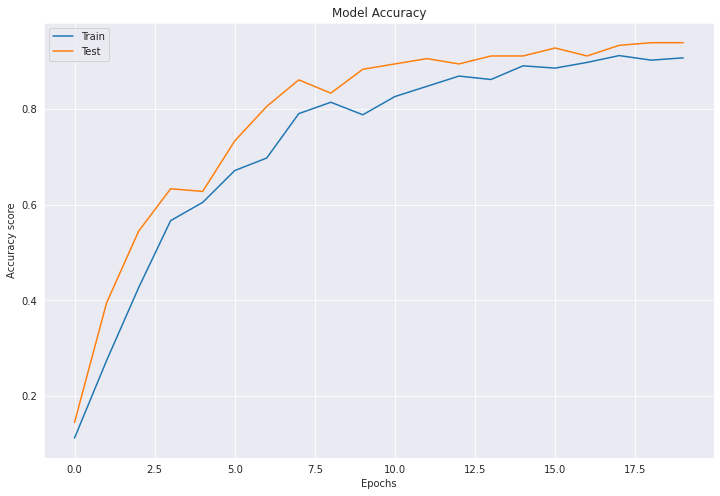

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(m2.history['acc'])
plt.plot(m2.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.legend(['Train','Test'])
plt.show()

## **plot model2 loss:**

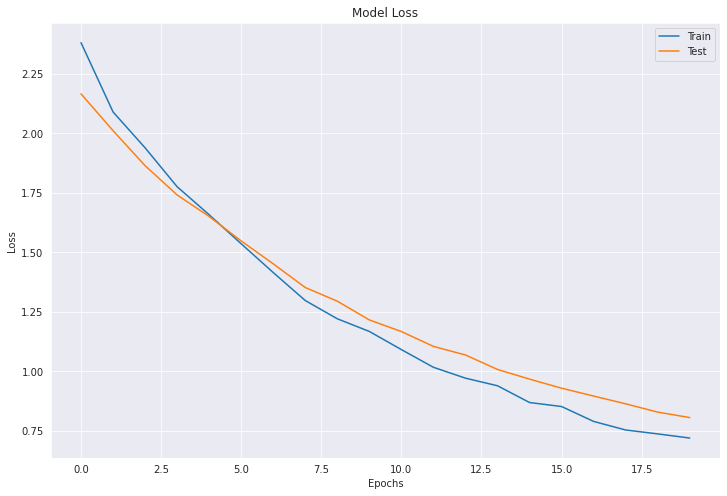

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(m2.history['loss'])
plt.plot(m2.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['Train','Test'])

## **predict using model2:**

In [ ]:
preds2=model2.predict(x_test)

In [ ]:
predictions2=np.argmax(preds2,axis=1)

In [ ]:
loss,accuracy=model2.evaluate(x_test,y_test)

5/5 [==============================] - 97s 19s/step - loss: 0.8438 - acc: 0.8411


In [ ]:
dict2={1: 'Danaus_plexippus', 2: 'Heliconius_charitonius', 3: 'Heliconius_erato', 4: 'Junonia_coenia', 5: 'Lycaena_phlaeas', 6: 'Nymphalis_antiopa', 7: 'Papilio_cresphontes', 8: 'Pieris_rapae', 9: 'Vanessa_atalanta', 10: 'Vanessa_cardui'} 

In [ ]:
predictions2

array([1, 8, 0, 3, 5, 6, 6, 1, 1, 8, 6, 5, 8, 9, 1, 9, 6, 4, 4, 8, 5, 4,
       6, 6, 0, 2, 6, 2, 5, 2, 8, 1, 9, 7, 7, 7, 1, 8, 8, 1, 2, 9, 8, 5,
       5, 3, 7, 4, 2, 3, 6, 7, 8, 8, 0, 7, 8, 0, 6, 3, 6, 2, 2, 6, 9, 7,
       4, 3, 8, 4, 7, 3, 5, 7, 8, 6, 9, 4, 5, 9, 5, 3, 1, 4, 5, 4, 6, 3,
       5, 0, 0, 0, 1, 6, 2, 9, 2, 3, 8, 6, 4, 9, 6, 0, 5, 0, 9, 1, 3, 4,
       3, 5, 2, 1, 9, 9, 8, 5, 0, 3, 5, 5, 1, 2, 5, 8, 2, 6, 4, 6, 9, 1,
       8, 5, 1, 8, 1, 4, 5, 8, 3, 4, 3, 1, 1, 5, 0, 2, 9, 2, 6])

In [ ]:
predictions

array([2, 8, 0, 3, 7, 6, 1, 1, 3, 8, 6, 5, 8, 9, 1, 8, 2, 4, 4, 8, 4, 9,
       6, 1, 0, 2, 8, 2, 7, 2, 8, 8, 9, 7, 7, 7, 1, 9, 8, 6, 1, 8, 8, 5,
       4, 9, 7, 4, 2, 3, 6, 7, 9, 8, 0, 7, 4, 0, 1, 8, 1, 2, 2, 6, 9, 7,
       4, 8, 8, 4, 7, 3, 9, 7, 8, 9, 9, 4, 5, 9, 5, 5, 2, 4, 5, 4, 6, 3,
       6, 0, 0, 0, 2, 6, 2, 3, 2, 3, 9, 6, 4, 9, 5, 0, 1, 0, 9, 2, 3, 4,
       3, 9, 2, 1, 9, 9, 5, 5, 0, 3, 0, 5, 2, 2, 6, 7, 1, 8, 4, 6, 9, 1,
       4, 7, 1, 8, 2, 4, 5, 8, 3, 4, 4, 1, 1, 5, 0, 2, 9, 2, 2])

## **saving model to the dataset link:**

---

link to acces the saved models:https://drive.google.com/drive/folders/1wRRGlN90i_vcNE6Z5hqq61WpP129QlnY?usp=sharing



```
# use this commands to load files after downloading necessary files from the link
#new_model=tf.keras.models.load_model('path/my_model1.h5')
#new_model2=tf.keras.models.load_model('path/my_model2.h5')

```



In [ ]:
model.save('/content/drive/MyDrive/butterfly dataset/my_model1.h5') 

In [ ]:
model2.save('/content/drive/MyDrive/butterfly dataset/my_model2.h5')

## **test yourself:**

---

using image url.

In [ ]:
import requests
from PIL import Image
from io import BytesIO

def process_image(url):
    response=requests.get(url)
    img=Image.open(BytesIO(response.content))
    fix,ax=plt.subplots(1,3,figsize=(15,20))
    ax[0].imshow(img)
    ax[0].set_title('image')
    img=np.array(img)
    img=cv2.cvtColor(img,cv2.IMREAD_COLOR)
    print(img.shape)
    img=img/255
    ax[1].imshow(img)
    ax[1].set_title('color image')
    
    #resizing
    img=cv2.resize(img,(224,224))
    print(img.shape)
    ax[2].imshow(img)
    ax[2].set_title('predicted image')
    plt.tight_layout()
    img=np.expand_dims(img,axis=0)
    #making it model ready
    print(img.shape)
    return img

In [ ]:
import requests
from PIL import Image
from io import BytesIO

def process_image(url):
    response=requests.get(url)
    img=Image.open(BytesIO(response.content))
    fix,ax=plt.subplots(1,3,figsize=(15,20))
    ax[0].imshow(img)
    ax[0].set_title('image')
    img=np.array(img)
    img=cv2.cvtColor(img,cv2.IMREAD_COLOR)
    print(img.shape)
    img=img/255
    ax[1].imshow(img)
    ax[1].set_title('color image')
    
    #resizing
    img=cv2.resize(img,(256,256))
    print(img.shape)
    ax[2].imshow(img)
    ax[2].set_title('predicted image')
    plt.tight_layout()
    img=np.expand_dims(img,axis=0)
    #making it model ready
    print(img.shape)
    return img

In [ ]:
def predict1(url):
    img=process_image(url)
    label=model.predict(img)
    final_1=np.argmax(label,axis=1)[0]
    plt.xlabel(dict2[final_1+1])
    return dict2[final_1+1]

In [ ]:
def predict2(url):
    img=process_image(url)
    label=model.predict(img)
    final_1=np.argmax(label,axis=1)[0]
    plt.xlabel(dict2[final_1+1])
    return dict2[final_1+1]

(194, 259, 3)
(256, 256, 3)
(1, 256, 256, 3)


'Heliconius_charitonius'

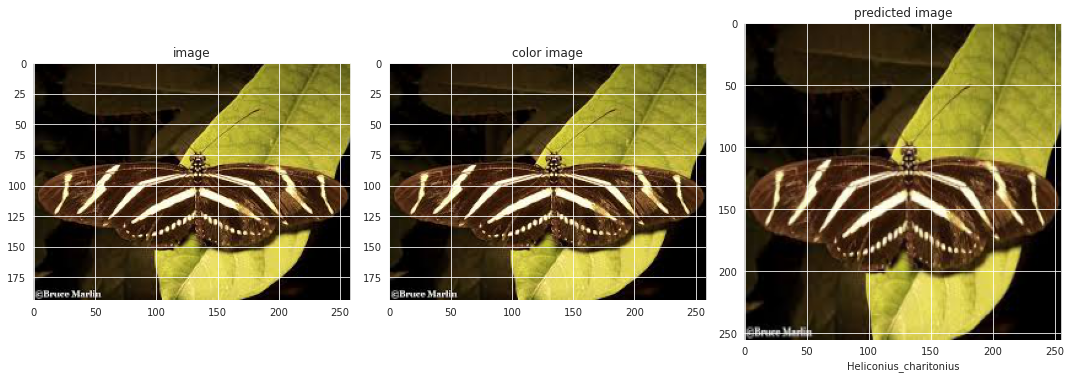

In [ ]:
predict1('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQNClNBfOY6f9o9Za354ihEzsuZHzH1J2hhAQ&usqp=CAU')

(183, 275, 3)
(256, 256, 3)
(1, 256, 256, 3)


'Heliconius_erato'

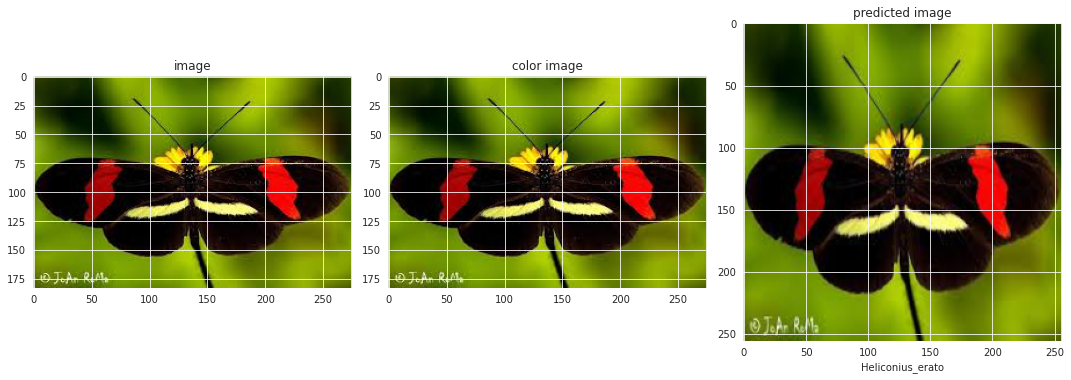

In [ ]:
predict1('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTamJ2bs3_tzRKU8GbVGaipm_0QypZvhHLH3w&usqp=CAU')

(225, 225, 3)
(256, 256, 3)
(1, 256, 256, 3)


'Pieris_rapae'

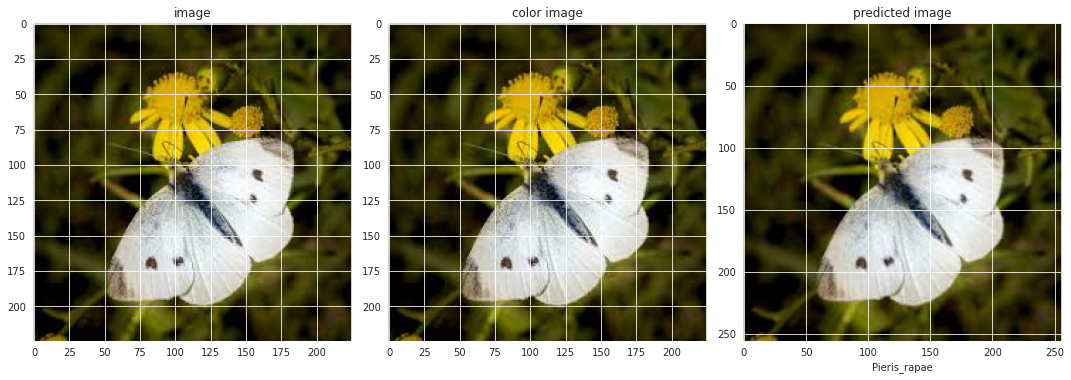

In [ ]:
predict2('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRNDyVKWq9pJkwrp_PeAbYCs5IUJzfDkkkahQ&usqp=CAU')

(1161, 1513, 3)
(256, 256, 3)
(1, 256, 256, 3)


'Papilio_cresphontes'

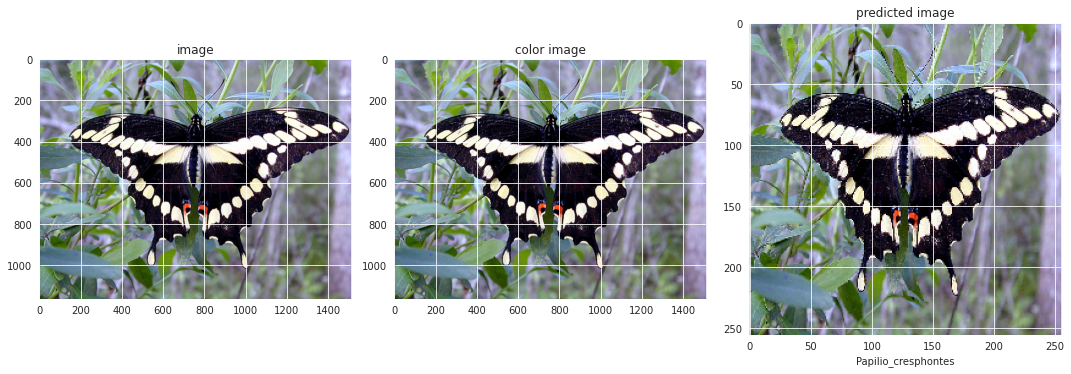

In [ ]:
predict2('https://www.naba.org/chapters/nabast/Giant%20Swallowtailrb.jpg')

places for improvement:


1.   could use data augmentation to build more complex dataset.
2.   can train for more number of epochs.

